<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  60 non-null     float64
 1   tip         60 non-null     float64
 2   sex         60 non-null     object 
 3   smoker      60 non-null     object 
 4   day         60 non-null     object 
 5   time        60 non-null     object 
 6   size        60 non-null     int64  
 7   Filter      60 non-null     int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.9+ KB


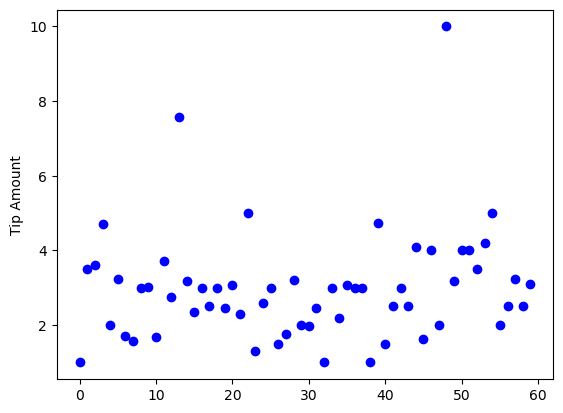

                    df      sum_sq   mean_sq         F    PR(>F)
C(sex)             1.0    2.521500  2.521500  1.132855  0.291735
C(smoker)          1.0    0.416667  0.416667  0.187199  0.666920
C(sex):C(smoker)   1.0    0.288427  0.288427  0.129584  0.720218
Residual          56.0  124.644400  2.225793       NaN       NaN


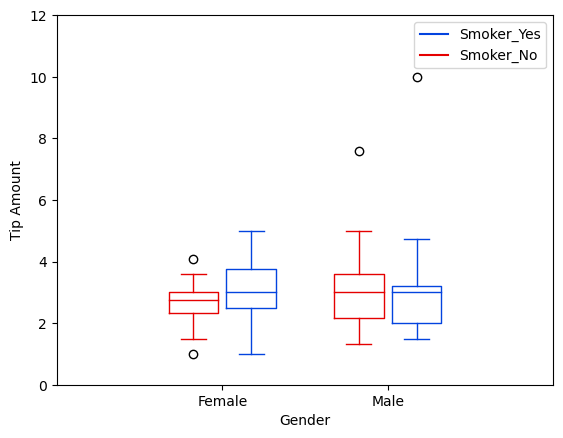

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb  1 19:06:14 2024

@author: aneek
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_column', None)
T1=pd.read_csv("C:/Users/aneek/Documents/Upwork/ANOVA/Private/tips_2WAY_EQ.csv")
len(T1.tip)
T1.info()
plt.scatter(T1.index,T1.tip, c="blue")
plt.ylabel("Tip Amount")
plt.show()
smoker_YES=[]
smoker_NO=[]
smoker_YES_male=T1.loc[(T1['sex']=='Male') & (T1['smoker']=='Yes'),['tip']]
smoker_YES_female=T1.loc[(T1['sex']=='Female') & (T1['smoker']=='Yes'),['tip']]
smoker_YES_male=smoker_YES_male['tip'].tolist()
smoker_YES_female=smoker_YES_female['tip'].tolist()
smoker_NO_male=T1.loc[(T1['sex']=='Male') & (T1['smoker']=='No'),['tip']]
smoker_NO_female=T1.loc[(T1['sex']=='Female') & (T1['smoker']=='No'),['tip']]
smoker_NO_male=smoker_NO_male['tip'].tolist()
smoker_NO_female=smoker_NO_female['tip'].tolist()
ticks=['Female','Male']
smoker_YES=[smoker_YES_female,smoker_YES_male]
smoker_NO=[smoker_NO_female,smoker_NO_male]
smok_YES_plot=plt.boxplot(smoker_YES,positions=np.array(np.arange(len(smoker_YES)))*2.0+0.35,widths=0.6)
smok_NO_plot=plt.boxplot(smoker_NO,positions=np.array(np.arange(len(smoker_NO)))*2.0-0.35,widths=0.6)
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    plt.plot([], c=color_code, label=label)
    plt.legend()
define_box_properties(smok_YES_plot, '#0343DF', 'Smoker_Yes')
define_box_properties(smok_NO_plot, '#E50000', 'Smoker_No')
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
plt.xlabel("Gender")
plt.ylabel("Tip Amount")
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 12)
model = ols('tip ~ C(sex) + C(smoker) + C(sex):C(smoker)',data=T1).fit() 
result = sm.stats.anova_lm(model, type=2) 
print(result) 
